In [9]:
import qiskit
import numpy as np
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer
# from qiskit import execute

*Drawing circuits:*
This is the first skill we'll learn because it'll help learn everything else in this section.
There are 2 options for drawing circuits: 

1). mpl 

2). text 

**mpl:**
- requires matplotlib to be installed

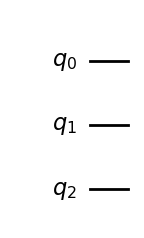

In [2]:
qc = QuantumCircuit(3)
qc.draw(output ='mpl') # mpl -> matplotlib

In [3]:
qc = QuantumCircuit(3)
qc.draw(output = 'text')

q_0: 
     
q_1: 
     
q_2:

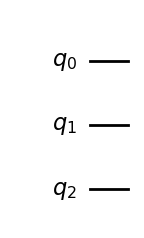

In [4]:
# circuit_drawer is not a method of the qc class - it's a function.
circuit_drawer(qc, output='mpl')

In [5]:
circuit_drawer(qc, output='text')

q_0: 
     
q_1: 
     
q_2:

### Saving quantum circuit
- you must save it using output='mpl'

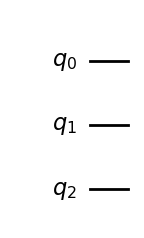

In [6]:
qc.draw('mpl', filename='circuit.pdf')

### Quantum and classical Registers

In [7]:
# You can concatenate quantum and classical registers
qc_quantum = QuantumRegister(2)
qc_classical = ClassicalRegister(2)
qc = QuantumCircuit(qc_quantum, qc_classical)

In [8]:
qc.draw(output='text')

q0_0: 
      
q0_1: 
      
c0: 2/

In [9]:
qc = QuantumCircuit(4,2)
qc.x(0)
qc.measure([0,3],[0,1])
# qc.measure_all()
qc.draw(output='text')

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
q_1: ──────╫─
           ║ 
q_2: ──────╫─
      ┌─┐  ║ 
q_3: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [10]:
qc = QuantumCircuit(4,2)
qc.x(0)
# qc.measure([0,3],[0,1])
qc.measure_all()
qc.draw(output='text')

┌───┐ ░ ┌─┐         
   q_0: ┤ X ├─░─┤M├─────────
        └───┘ ░ └╥┘┌─┐      
   q_1: ──────░──╫─┤M├──────
              ░  ║ └╥┘┌─┐   
   q_2: ──────░──╫──╫─┤M├───
              ░  ║  ║ └╥┘┌─┐
   q_3: ──────░──╫──╫──╫─┤M├
              ░  ║  ║  ║ └╥┘
   c: 2/═════════╬══╬══╬══╬═
                 ║  ║  ║  ║ 
meas: 4/═════════╩══╩══╩══╩═
                 0  1  2  3

In [11]:
qc = QuantumCircuit(4,2)
qc.x(0)
qc.mcx([0,1],2)
qc.barrier(0,1,2,3)
qc.draw(output='text')

┌───┐      ░ 
q_0: ┤ X ├──■───░─
     └───┘  │   ░ 
q_1: ───────■───░─
          ┌─┴─┐ ░ 
q_2: ─────┤ X ├─░─
          └───┘ ░ 
q_3: ───────────░─
                ░ 
c: 2/═════════════

In [13]:
from qiskit.providers.aer import Aer
from qiskit import transpile

In [14]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts)

NameError: name 'execute' is not defined

In [ ]:
# works with current qiskit
print('works with current qiskit ' + str(qiskit.__version__))
from qiskit import transpile
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
qc.draw('mpl')



In [ ]:
# get the counts
simulator = Aer.get_backend('qasm_simulator')
circuit_isa = transpile(qc, simulator)
result = simulator.run(circuit_isa, shots=1000).result()
counts = result.get_counts(qc)
print(counts)